#### FINAL PROJECT PHASE II

### Research Question:

Can we reliably predict a person's drug use based off a person's personality traits? What types of drugs are more likely to be used by certain personalities?

In this assignment we would like to see if there is a correlation between specific personality traits and drug use, specifically we will look at: neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, and sensation seeking. We will train a multivariable regression to see if we can reliably predict a person's drug use based on a person's personality traits.

### Importing:

In [1]:
#pip install ucimlrepo

In [2]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_squared_error, 
mean_absolute_error, mean_absolute_percentage_error)

### Data Overview/Description:

This dataset contains records for 1885 respondents with the following 12 attributes: personality measurements(neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, sensation seeking), level of education, age, gender, country of residence, and ethnicity. It also contains responses for the responders use of 18 legal and illegal drugs: alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and Semerone (fictitious drug to identify overresponders). The responders have selected whether they never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. The rows correspond to each respondant and the columns correspond to each drug use, personality, and demographic information for each participant. 

This dataset was accessed from UC Irvine Machine Learning Repository, where it was created by Elaine Fehrman, Vincent Egan, and Evgeny Mirkes. This data set was created to evaluate an individual's risk of drug consumption and misuse based on categorical data. This data collection was independantly created and funded by the authors of the data set. The process that this data was collected in was an anonymous online survey methodology from Survey Gizmo, which could have influenced what data was observed and recorded because the responders can choose which questions to answer honestly or not. The people had to take a personality test to get the personality data. The data was analyzed and organized by the three authors listed at the beginning of this paragraph, and the uci machine learning repositiory obtained it for us to get the current form of the data. The people responding were aware of the data collection, as they filled out the form voluntarily, and knew what the data was going to be used for.

Here is the link to the dataset: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified
and here is the github link to the raw data: https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file

In [3]:
drug_consumption = fetch_ucirepo(id=373) 
  
drug_consumption.data.features

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


We imported the data frame following the directions from the uci databse website, which imports the dataset as a pandas dataframe. It created a data frame of features shown above, which show the categorical data about the particpant. It also created a data frame of targets shown below, which shows the data about the drug use for each participant.

In [4]:
drug_consumption.data.targets 

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Below, a data frame showing the variables for the data frame is shown, showing the type of each variable, along with the fact that there are no missing values for any of the categories

In [5]:
print(drug_consumption.variables) 

         name     role         type      demographic description units  \
0          id       ID      Integer             None        None  None   
1         age  Feature   Continuous              Age        None  None   
2      gender  Feature   Continuous           Gender        None  None   
3   education  Feature   Continuous  Education Level        None  None   
4     country  Feature   Continuous      Nationality        None  None   
5   ethnicity  Feature   Continuous        Ethnicity        None  None   
6      nscore  Feature   Continuous             None        None  None   
7      escore  Feature   Continuous             None        None  None   
8      oscore  Feature   Continuous             None        None  None   
9      ascore  Feature   Continuous             None        None  None   
10     cscore  Feature   Continuous             None        None  None   
11  impuslive  Feature   Continuous             None        None  None   
12         ss  Feature   Continuous   

##### Data Cleaning:

The first thing we decided to do is focus on the personality aspects, so we delted the columns that were irrelevant to our analysis: level of education, age, gender, country of residence, and ethnicity.

In [6]:
print("Columns before cleaning: ")
print(drug_consumption.data.features.columns)
drug_consumption.data.features = drug_consumption.data.features.drop(
    ['age'], axis=1)
drug_consumption.data.features = drug_consumption.data.features.drop([
    'gender'], axis=1)
drug_consumption.data.features = drug_consumption.data.features.drop(
    ['education'], axis=1)
drug_consumption.data.features = drug_consumption.data.features.drop(
    ['country'], axis=1)
drug_consumption.data.features = drug_consumption.data.features.drop(
    ['ethnicity'], axis=1)
print(drug_consumption.data.features)
print("Columns after cleaning: ")
print(drug_consumption.data.features.columns)

Columns before cleaning: 
Index(['age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss'],
      dtype='object')
       nscore   escore   oscore   ascore   cscore  impuslive       ss
0     0.31287 -0.57545 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084
1    -0.67825  1.93886  1.43533  0.76096 -0.14277   -0.71126 -0.21575
2    -0.46725  0.80523 -0.84732 -1.62090 -1.01450   -1.37983  0.40148
3    -0.14882 -0.80615 -0.01928  0.59042  0.58489   -1.37983 -1.18084
4     0.73545 -1.63340 -0.45174 -0.30172  1.30612   -0.21712 -0.21575
...       ...      ...      ...      ...      ...        ...      ...
1880 -1.19430  1.74091  1.88511  0.76096 -1.13788    0.88113  1.92173
1881 -0.24649  1.74091  0.58331  0.76096 -1.51840    0.88113  0.76540
1882  1.13281 -1.37639 -1.27553 -1.77200 -1.38502    0.52975 -0.52593
1883  0.91093 -1.92173  0.29338 -1.62090 -2.57309    1.29221  1.22470
1884 -0.46725  2.12700  1.65653  1.11406  0.

In [7]:
drug_consumption.data.features = drug_consumption.data.features.rename(
    columns={'nscore': 'neuroticism', 'escore': 'extraversion',
           'oscore': 'openness', 'ascore': 'agreeableness',
            'cscore': 'conscientiousness', 'impuslive': 'impulsive','ss': 'sensation-seeking'})
print(drug_consumption.data.features.columns)
print(drug_consumption.data.features)

Index(['neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsive', 'sensation-seeking'],
      dtype='object')
      neuroticism  extraversion  openness  agreeableness  conscientiousness  \
0         0.31287      -0.57545  -0.58331       -0.91699           -0.00665   
1        -0.67825       1.93886   1.43533        0.76096           -0.14277   
2        -0.46725       0.80523  -0.84732       -1.62090           -1.01450   
3        -0.14882      -0.80615  -0.01928        0.59042            0.58489   
4         0.73545      -1.63340  -0.45174       -0.30172            1.30612   
...           ...           ...       ...            ...                ...   
1880     -1.19430       1.74091   1.88511        0.76096           -1.13788   
1881     -0.24649       1.74091   0.58331        0.76096           -1.51840   
1882      1.13281      -1.37639  -1.27553       -1.77200           -1.38502   
1883      0.91093      -1.92173   0.29338       -1.62090  

In [8]:
print("Unique target values before conversion:")
for column in drug_consumption.data.targets.columns:
    unique_values = drug_consumption.data.targets[column].unique()
    print(f"Unique values for {column}: {unique_values}")
converted_targets = drug_consumption.data.targets.copy()
for column in drug_consumption.data.targets.columns:
    for index in range(len(drug_consumption.data.targets)):
        converted_targets.loc[index, column] = int(
            drug_consumption.data.targets.loc[index, column][2])
drug_consumption.data.targets = converted_targets
print("\nUnique target values after conversion:")
for column in drug_consumption.data.targets.columns:
    unique_values = drug_consumption.data.targets[column].unique()
    print(f"Unique values for {column}: {unique_values}")
print(drug_consumption.data.targets)

Unique target values before conversion:
Unique values for alcohol: ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
Unique values for amphet: ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values for amyl: ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values for benzos: ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6']
Unique values for caff: ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2']
Unique values for cannabis: ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5']
Unique values for choc: ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1']
Unique values for coke: ['CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4']
Unique values for crack: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values for ecstasy: ['CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5']
Unique values for heroin: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4']
Unique values for ketamine: ['CL0' 'CL2' 'CL3' 'CL1' 'CL5' 'CL4' 'CL6']
Unique values for legalh: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values for lsd: ['CL0' 'CL2' 'CL1' 'CL3' 'CL4'

In [9]:
print("Columns before cleaning: ")
print(drug_consumption.data.targets.columns)
drug_consumption.data.targets = drug_consumption.data.targets.drop(
    ['semer'], axis=1)
print("Columns after cleaning: ")
print(drug_consumption.data.targets.columns)

Columns before cleaning: 
Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')
Columns after cleaning: 
Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'vsa'],
      dtype='object')


In [10]:
drug_consumption.data.targets["total drug use"] = (
    drug_consumption.data.targets[['alcohol', 'amphet', 
        'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'vsa']].sum(axis=1))
print(drug_consumption.data.targets)

     alcohol amphet amyl benzos caff cannabis choc coke crack ecstasy heroin  \
0          5      2    0      2    6        0    5    0     0       0      0   
1          5      2    2      0    6        4    6    3     0       4      0   
2          6      0    0      0    6        3    4    0     0       0      0   
3          4      0    0      3    5        2    4    2     0       0      0   
4          4      1    1      0    6        3    6    0     0       1      0   
...      ...    ...  ...    ...  ...      ...  ...  ...   ...     ...    ...   
1880       5      0    0      0    4        5    4    0     0       0      0   
1881       5      0    0      0    5        3    4    0     0       2      0   
1882       4      6    5      5    6        6    6    4     0       4      0   
1883       5      0    0      0    6        6    5    0     0       3      0   
1884       4      3    0      3    6        3    6    3     0       3      0   

     ketamine legalh lsd meth mushrooms

### Exploratory Data Analysis:

                   neuroticism  extraversion  openness  agreeableness  \
neuroticism           1.000000     -0.431051  0.010177      -0.216964   
extraversion         -0.431051      1.000000  0.245277       0.157336   
openness              0.010177      0.245277  1.000000       0.038516   
agreeableness        -0.216964      0.157336  0.038516       1.000000   
conscientiousness    -0.391088      0.308024 -0.056811       0.247482   
impulsive             0.174399      0.114151  0.277512      -0.229690   
sensation-seeking     0.079988      0.210130  0.421709      -0.208061   
alcohol              -0.001882      0.092303  0.032711      -0.021806   
amphet                0.131120     -0.041095  0.221116      -0.148868   
amyl                  0.033317      0.030199  0.060511      -0.096057   
benzos                0.272221     -0.103442  0.201334      -0.164512   
caff                  0.013032      0.054343  0.027304      -0.016190   
cannabis              0.095535     -0.014369  0.414

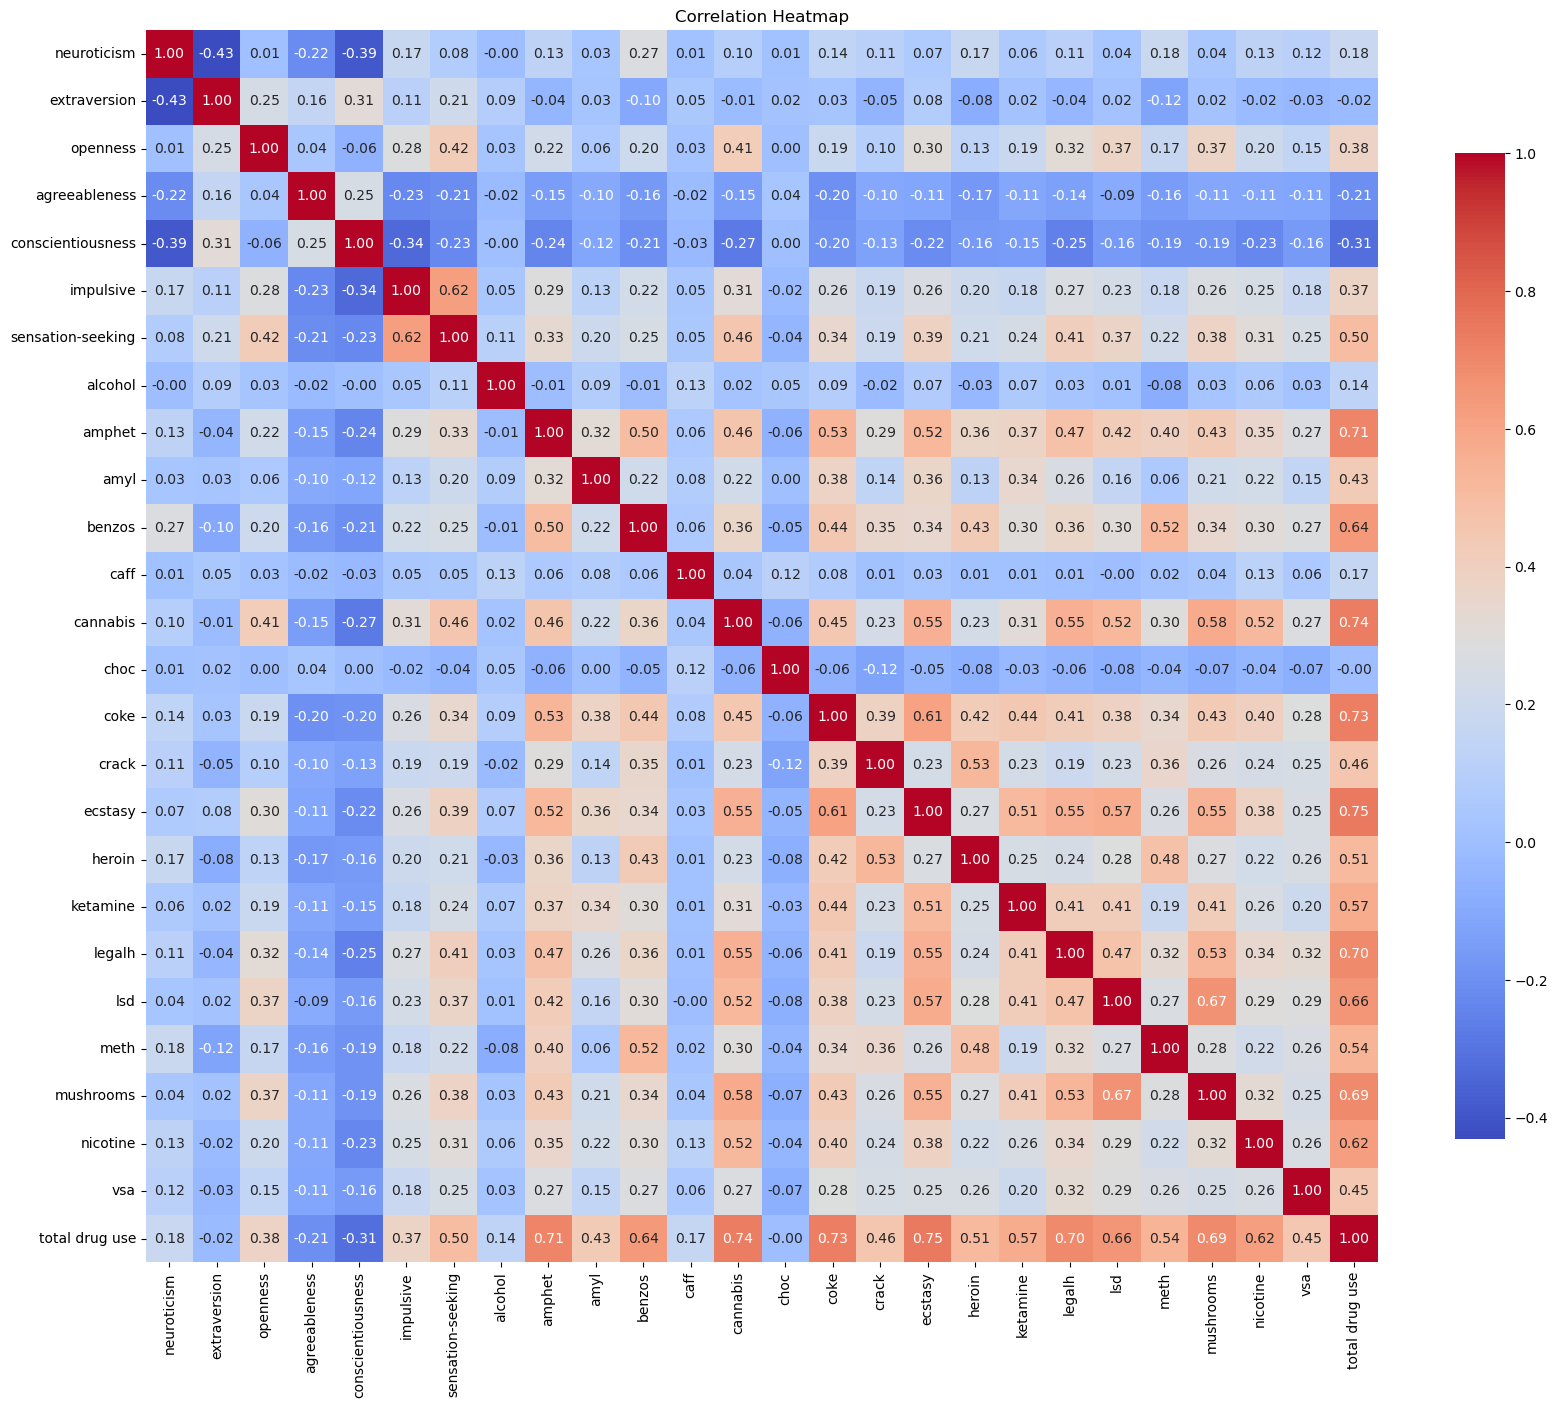

In [11]:
data_combined = pd.concat([drug_consumption.data.features, 
                           drug_consumption.data.targets], axis=1)
correlation_matrix = data_combined.corr()
print(correlation_matrix)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [12]:
X = drug_consumption.data.features  
y = drug_consumption.data.targets["alcohol"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1319, 7)
Testing set size: (566, 7)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
mse= mean_squared_error(y_train, y_hat_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_hat_train)
mape=mean_absolute_percentage_error(y_train,y_hat_train)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  1.7056063718240548
Root mean squared error:  1.3059886568512205
Mean absolute error:  0.9895608087847961
Mean absolute percentage error: 357721636780234.25


In [14]:
mse= mean_squared_error(y_test, y_hat_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_hat_test)
mape=mean_absolute_percentage_error(y_test, y_hat_test)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  1.8312229975459637
Root mean squared error:  1.3532268832483205
Mean absolute error:  1.0052992220814083
Mean absolute percentage error: 411403996710409.9


In [15]:
X = drug_consumption.data.features 
y = drug_consumption.data.targets["cannabis"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1319, 7)
Testing set size: (566, 7)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
mse= mean_squared_error(y_train, y_hat_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_hat_train)
mape=mean_absolute_percentage_error(y_train,y_hat_train)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  3.478299111124133
Root mean squared error:  1.8650198688282473
Mean absolute error:  1.5495058824288344
Mean absolute percentage error: 1898862616483814.5


In [17]:
mse= mean_squared_error(y_test, y_hat_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_hat_test)
mape=mean_absolute_percentage_error(y_test, y_hat_test)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  3.8494095627231624
Root mean squared error:  1.9619912239159385
Mean absolute error:  1.6395012680028571
Mean absolute percentage error: 1695378312797379.5


In [18]:
X = drug_consumption.data.features  
y = drug_consumption.data.targets["coke"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1319, 7)
Testing set size: (566, 7)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
mse= mean_squared_error(y_train, y_hat_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_hat_train)
mape=mean_absolute_percentage_error(y_train,y_hat_train)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  1.8948881520437577
Root mean squared error:  1.376549364187045
Mean absolute error:  1.1147791872719666
Mean absolute percentage error: 2422414540135182.0


In [20]:
mse= mean_squared_error(y_test, y_hat_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_hat_test)
mape=mean_absolute_percentage_error(y_test, y_hat_test)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  2.0532228487854574
Root mean squared error:  1.432907131947307
Mean absolute error:  1.1619073177676522
Mean absolute percentage error: 2383727912839615.0


In [21]:
X = drug_consumption.data.features  
y = drug_consumption.data.targets["nicotine"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1319, 7)
Testing set size: (566, 7)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
mse= mean_squared_error(y_train, y_hat_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_hat_train)
mape=mean_absolute_percentage_error(y_train,y_hat_train)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  4.923859755019806
Root mean squared error:  2.218977186683046
Mean absolute error:  1.9545479073036112
Mean absolute percentage error: 2654432878406679.5


In [23]:
mse= mean_squared_error(y_test, y_hat_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_hat_test)
mape=mean_absolute_percentage_error(y_test, y_hat_test)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  5.4223310920861625
Root mean squared error:  2.3285899364392524
Mean absolute error:  2.0225818289336033
Mean absolute percentage error: 3162757668683441.0


In [24]:
X = drug_consumption.data.features  
y = drug_consumption.data.targets["total drug use"]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1319, 7)
Testing set size: (566, 7)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
mse= mean_squared_error(y_train, y_hat_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train, y_hat_train)
mape=mean_absolute_percentage_error(y_train,y_hat_train)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  143.36987313428637
Root mean squared error:  11.973715928411128
Mean absolute error:  9.457206793515276
Mean absolute percentage error: 138419361356336.84


In [26]:
mse= mean_squared_error(y_test, y_hat_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_hat_test)
mape=mean_absolute_percentage_error(y_test, y_hat_test)
print("Mean squared error: ", mse)
print("Root mean squared error: ", rmse)
print("Mean absolute error: ", mae)
print("Mean absolute percentage error:", mape)

Mean squared error:  157.5902593170325
Root mean squared error:  12.553495900227652
Mean absolute error:  10.001344199550061
Mean absolute percentage error: 0.3549095506513407


#### Summary of error analysis:

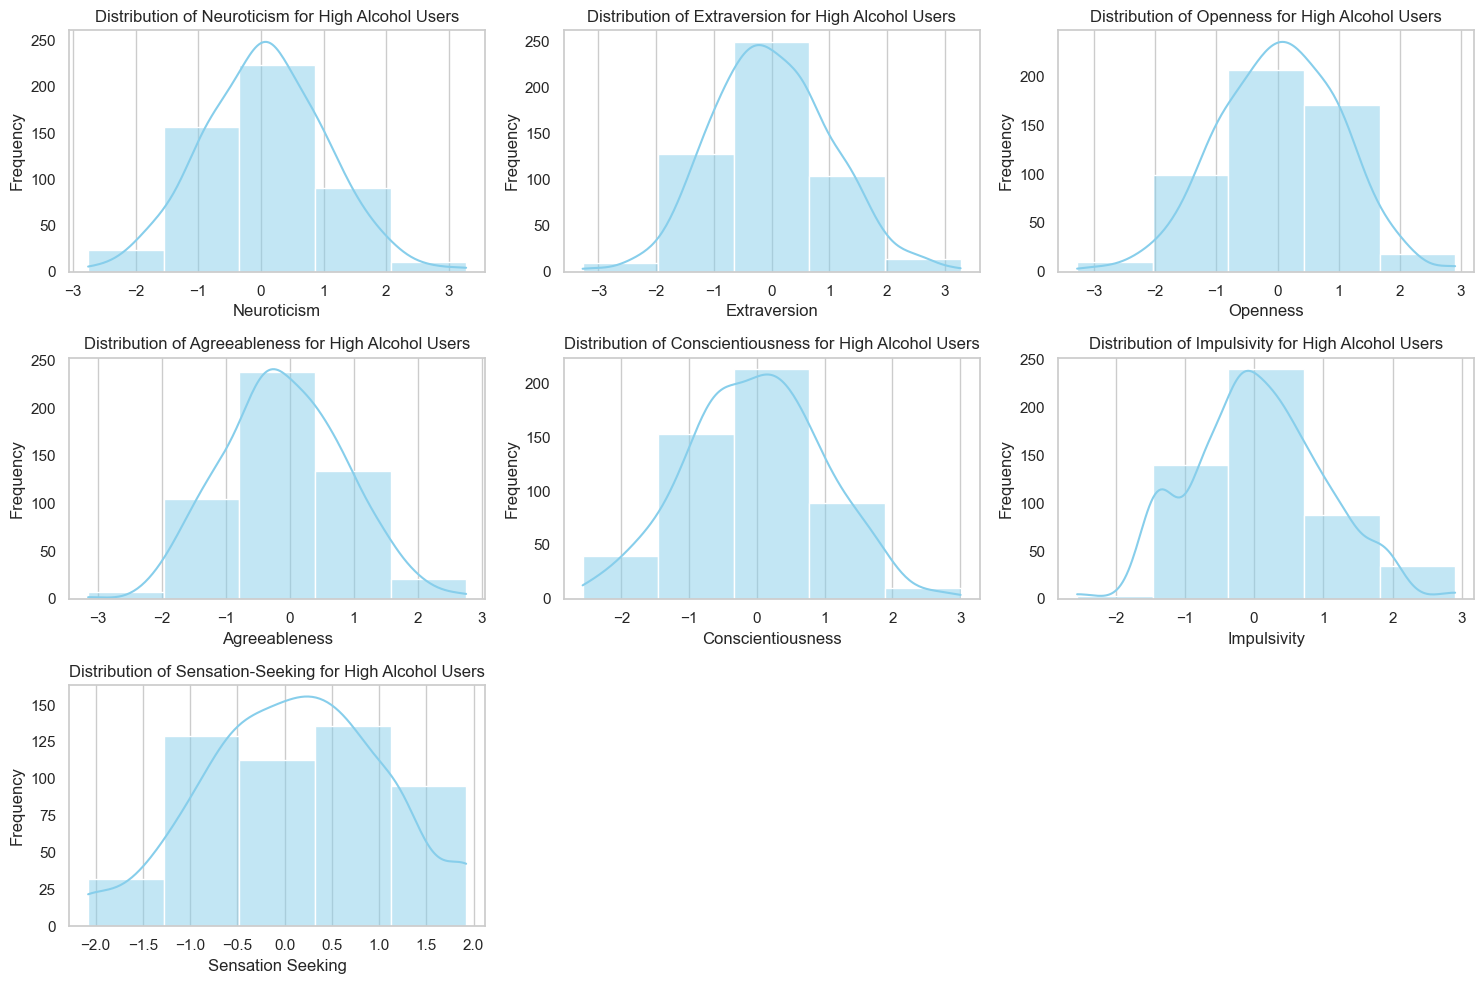

In [27]:
high_alcohol_users = data_combined[data_combined['alcohol'].isin([6])]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(high_alcohol_users['neuroticism'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Neuroticism for High Alcohol Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 2)
sns.histplot(high_alcohol_users['extraversion'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Extraversion for High Alcohol Users")
plt.xlabel("Extraversion")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 3)
sns.histplot(high_alcohol_users['openness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Openness for High Alcohol Users")
plt.xlabel("Openness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 4)
sns.histplot(high_alcohol_users['agreeableness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Agreeableness for High Alcohol Users")
plt.xlabel("Agreeableness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 5)
sns.histplot(high_alcohol_users['conscientiousness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Alcohol Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 6)
sns.histplot(high_alcohol_users['impulsive'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Impulsivity for High Alcohol Users")
plt.xlabel("Impulsivity")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 7)
sns.histplot(high_alcohol_users['sensation-seeking'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Alcohol Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

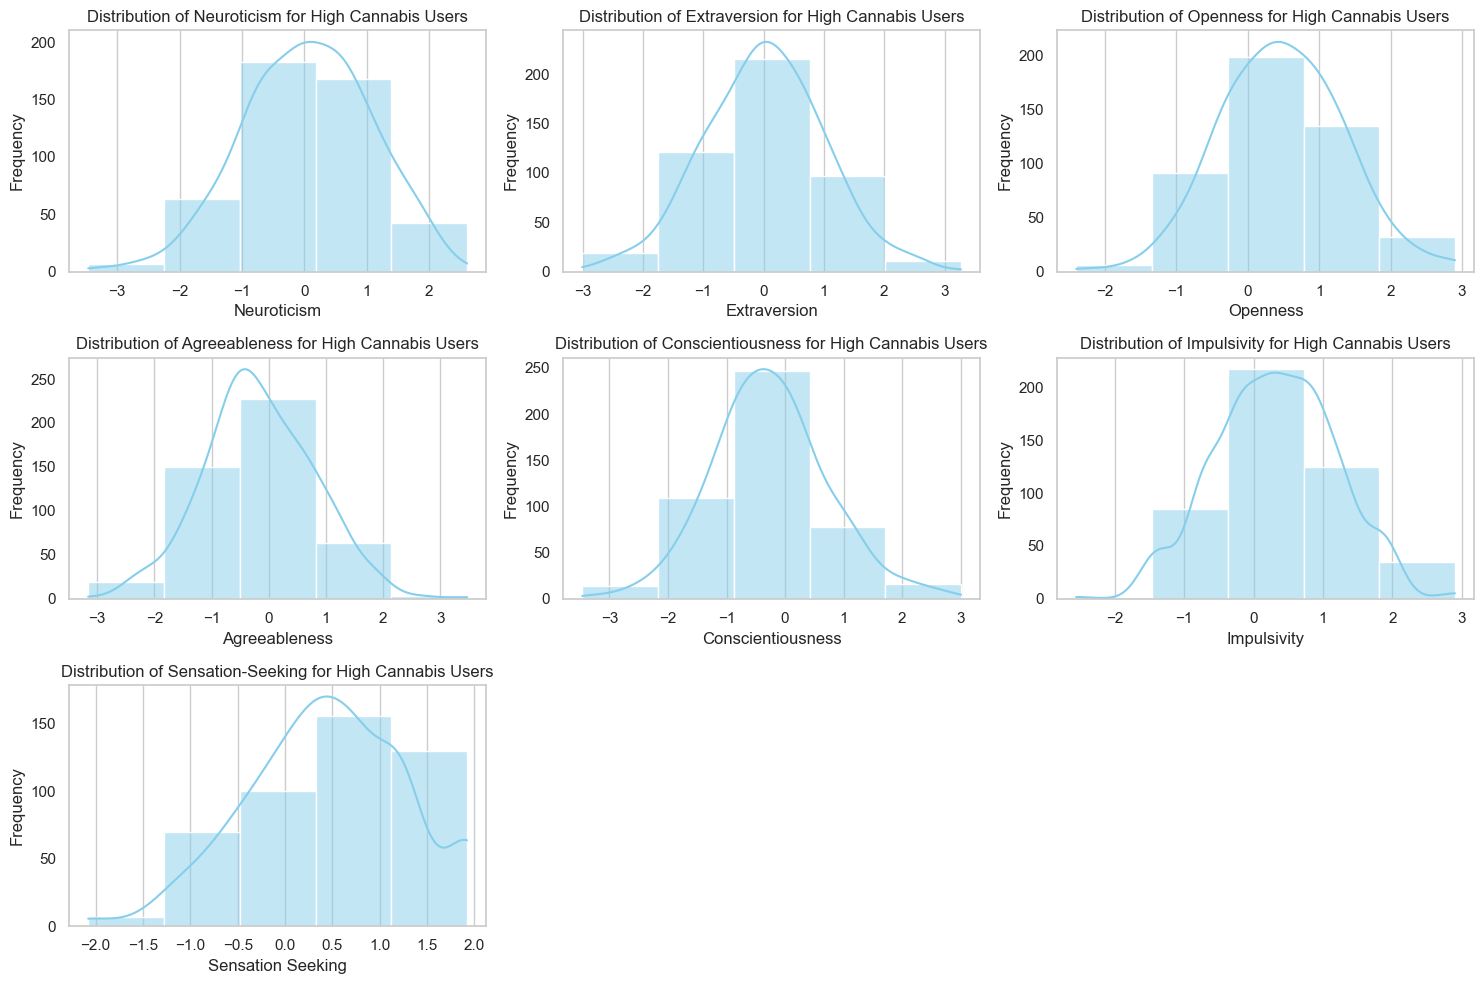

In [28]:
high_cannabis_users = data_combined[data_combined['cannabis'].isin([6])]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(high_cannabis_users['neuroticism'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Neuroticism for High Cannabis Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 2)
sns.histplot(high_cannabis_users['extraversion'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Extraversion for High Cannabis Users")
plt.xlabel("Extraversion")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 3)
sns.histplot(high_cannabis_users['openness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Openness for High Cannabis Users")
plt.xlabel("Openness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 4)
sns.histplot(high_cannabis_users['agreeableness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Agreeableness for High Cannabis Users")
plt.xlabel("Agreeableness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 5)
sns.histplot(high_cannabis_users['conscientiousness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Cannabis Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 6)
sns.histplot(high_cannabis_users['impulsive'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Impulsivity for High Cannabis Users")
plt.xlabel("Impulsivity")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 7)
sns.histplot(high_cannabis_users['sensation-seeking'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Cannabis Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

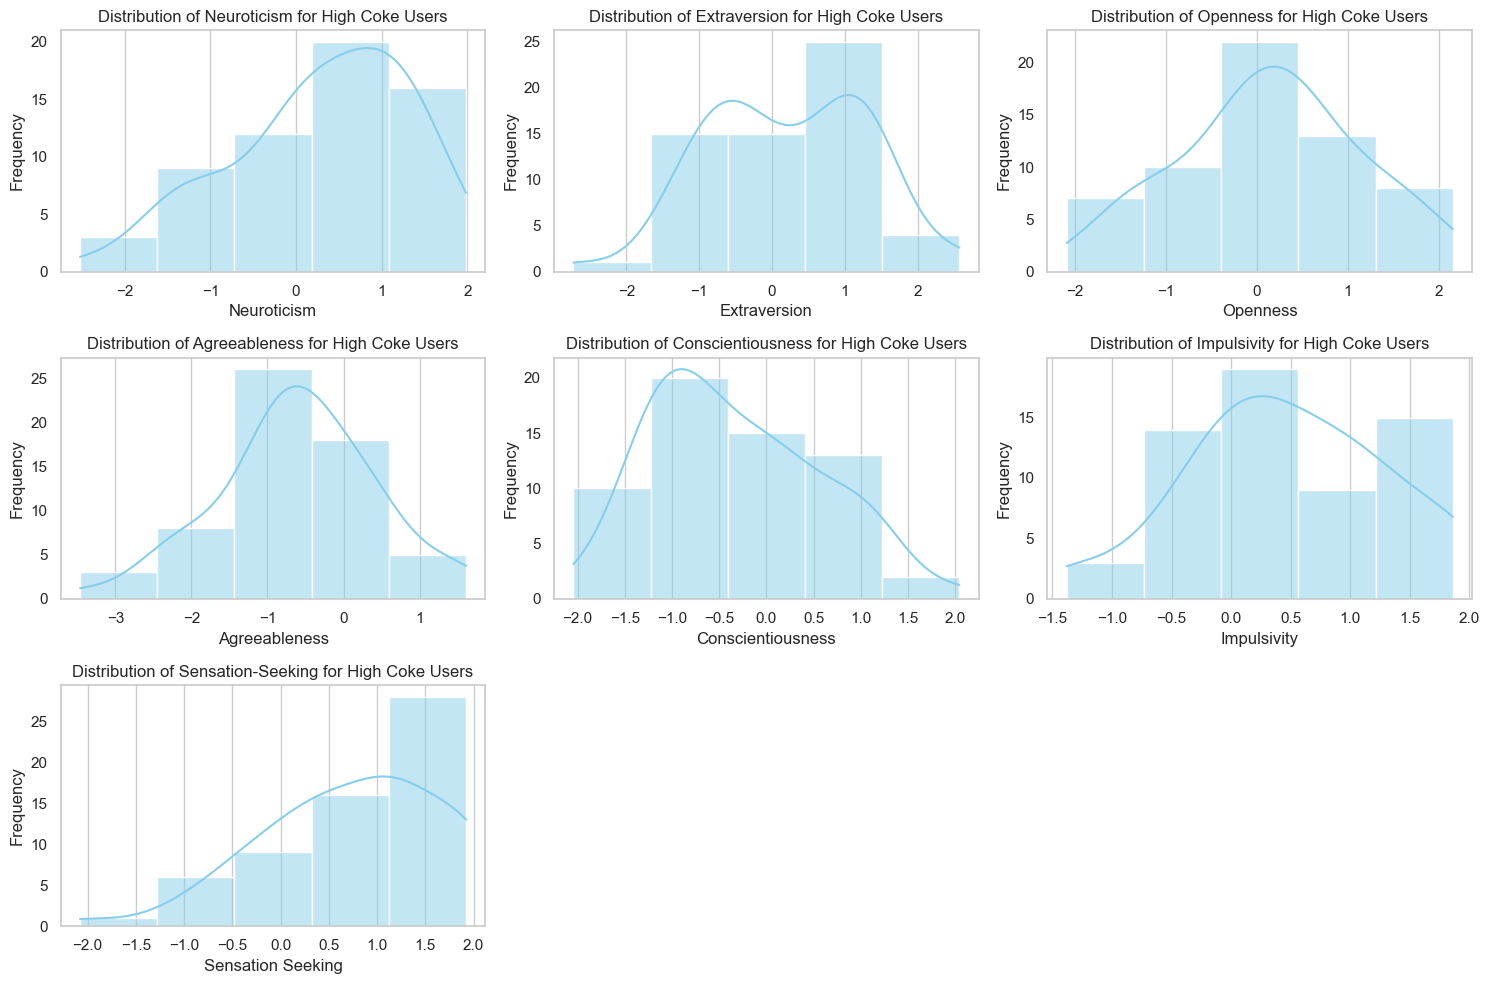

In [29]:
high_coke_users = data_combined[data_combined['coke'].isin([5,6])]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(high_coke_users['neuroticism'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Neuroticism for High Coke Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 2)
sns.histplot(high_coke_users['extraversion'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Extraversion for High Coke Users")
plt.xlabel("Extraversion")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 3)
sns.histplot(high_coke_users['openness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Openness for High Coke Users")
plt.xlabel("Openness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 4)
sns.histplot(high_coke_users['agreeableness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Agreeableness for High Coke Users")
plt.xlabel("Agreeableness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 5)
sns.histplot(high_coke_users['conscientiousness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Coke Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 6)
sns.histplot(high_coke_users['impulsive'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Impulsivity for High Coke Users")
plt.xlabel("Impulsivity")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 7)
sns.histplot(high_coke_users['sensation-seeking'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Coke Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

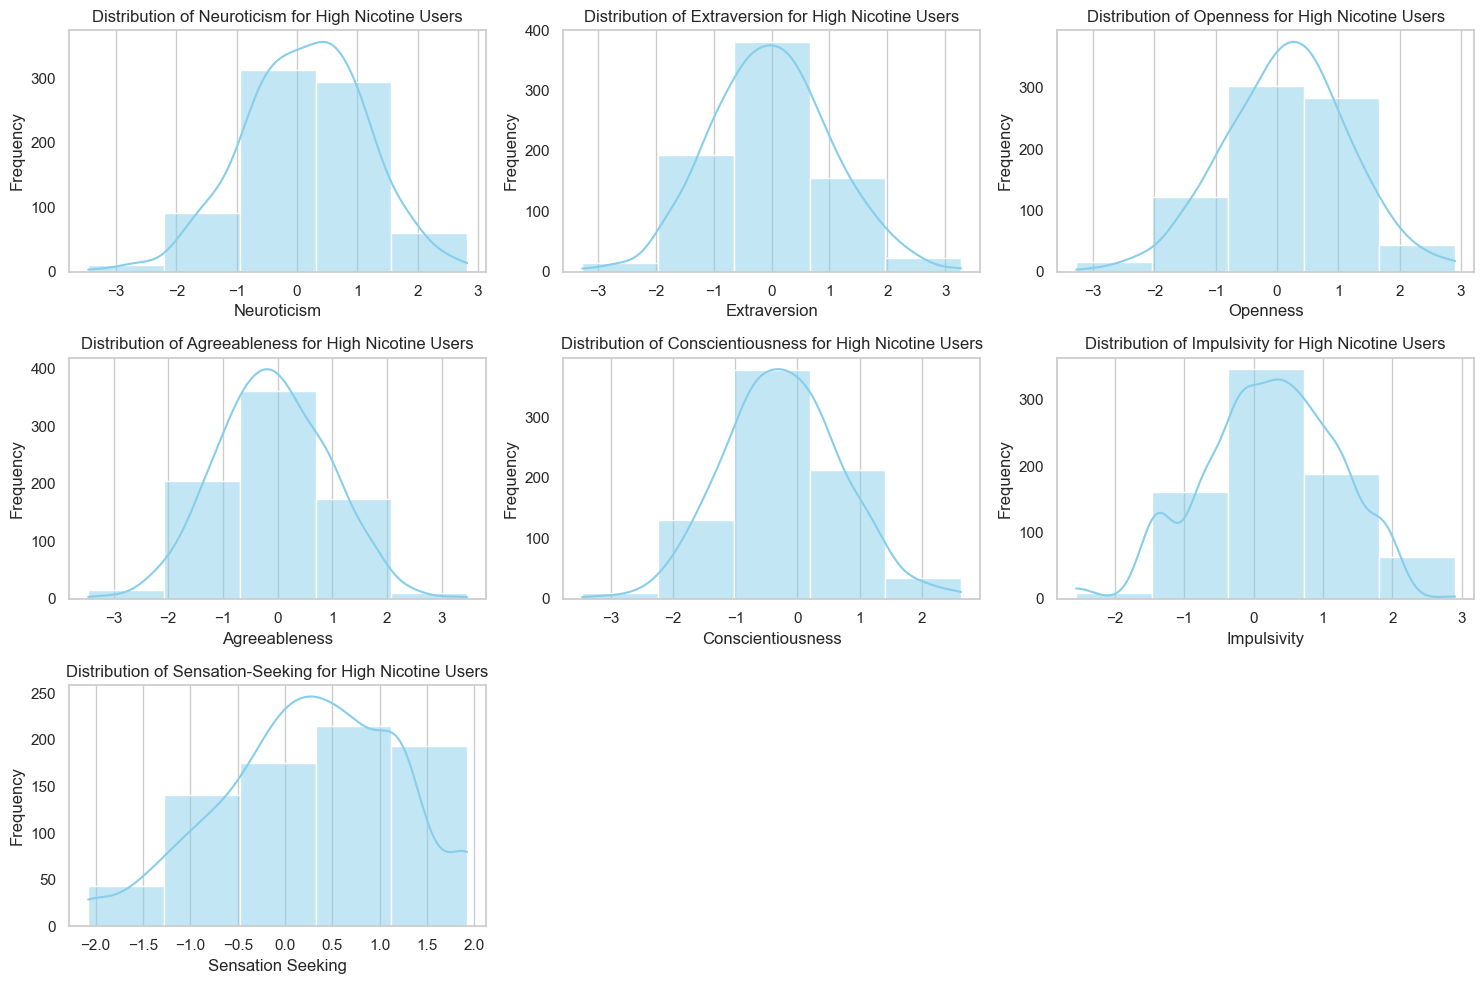

In [30]:
high_nicotine_users = data_combined[data_combined['nicotine'].isin([5,6])]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(high_nicotine_users['neuroticism'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Neuroticism for High Nicotine Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 2)
sns.histplot(high_nicotine_users['extraversion'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Extraversion for High Nicotine Users")
plt.xlabel("Extraversion")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 3)
sns.histplot(high_nicotine_users['openness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Openness for High Nicotine Users")
plt.xlabel("Openness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 4)
sns.histplot(high_nicotine_users['agreeableness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Agreeableness for High Nicotine Users")
plt.xlabel("Agreeableness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 5)
sns.histplot(high_nicotine_users['conscientiousness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Nicotine Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 6)
sns.histplot(high_nicotine_users['impulsive'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Impulsivity for High Nicotine Users")
plt.xlabel("Impulsivity")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 7)
sns.histplot(high_nicotine_users['sensation-seeking'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Nicotine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

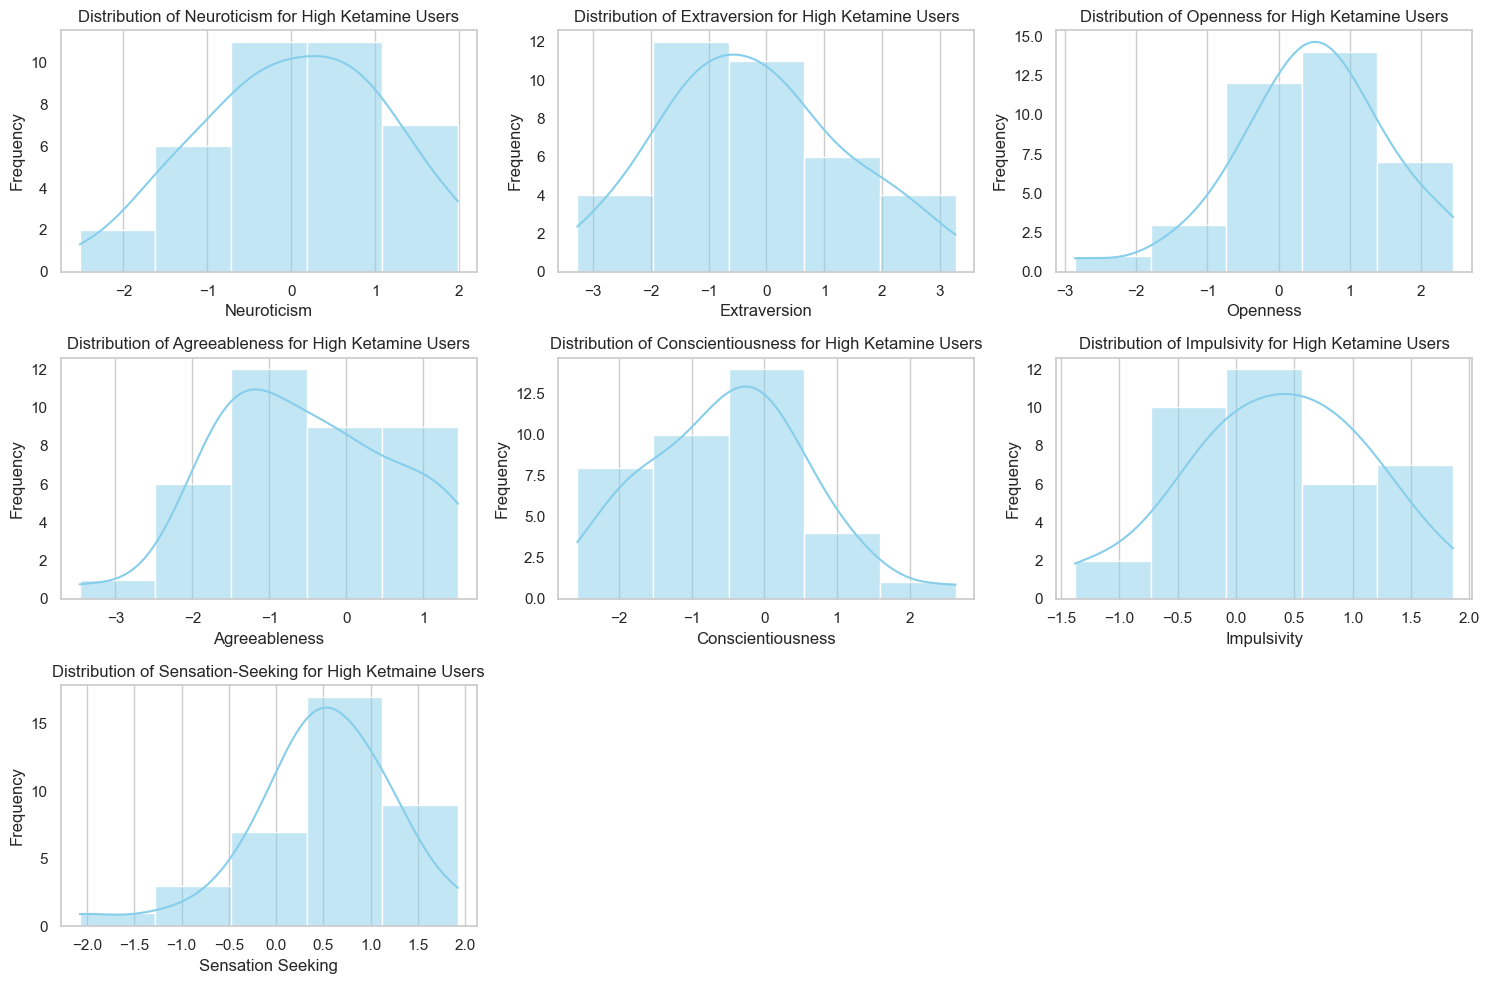

In [32]:
high_ketamine_users = data_combined[data_combined['ketamine'].isin([5,6])]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(high_ketamine_users['neuroticism'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Neuroticism for High Ketamine Users")
plt.xlabel("Neuroticism")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 2)
sns.histplot(high_ketamine_users['extraversion'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Extraversion for High Ketamine Users")
plt.xlabel("Extraversion")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 3)
sns.histplot(high_ketamine_users['openness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Openness for High Ketamine Users")
plt.xlabel("Openness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 4)
sns.histplot(high_ketamine_users['agreeableness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Agreeableness for High Ketamine Users")
plt.xlabel("Agreeableness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 5)
sns.histplot(high_ketamine_users['conscientiousness'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Conscientiousness for High Ketamine Users")
plt.xlabel("Conscientiousness")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 6)
sns.histplot(high_ketamine_users['impulsive'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Impulsivity for High Ketamine Users")
plt.xlabel("Impulsivity")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.subplot(3, 3, 7)
sns.histplot(high_ketamine_users['sensation-seeking'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Sensation-Seeking for High Ketmaine Users")
plt.xlabel("Sensation Seeking")
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Data Limitations:

### Questions for Reviewers: